# ***Importation des packages***

In [ ]:
import pandas as pd # pour manipuler les dataframes
import numpy as np  #pour manipuler les dataframes comme des tableaux(Array)

from  sklearn.model_selection import train_test_split # pour deviser les données (partie Training et partie Test)

from sklearn.tree import DecisionTreeRegressor #importation du modele decision tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso #importation du modele regression lineaire

from sklearn.metrics import classification_report,confusion_matrix # pour tester la performance de notre modele

from sklearn.model_selection import GridSearchCV, ShuffleSplit # pour determiner le meilleur
                                                                # modele avec les meilleures parametres


import matplotlib.pyplot as plt # Pour la visualisation des données
import seaborn as sns # Pour la visualisation des données ( basée sur matplotlib)

from sklearn.preprocessing import StandardScaler #pour la normalisation des données

# ***Importation du data***

In [ ]:
data=pd.read_csv('car_ppp.csv') #chargement du dataset

# ***Exploration de données(EDA)***

In [ ]:
data.shape  #pour afficher le nombre de lignes et le nombre de colonnes

(8128, 13)

In [ ]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
data.describe(include=object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [ ]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

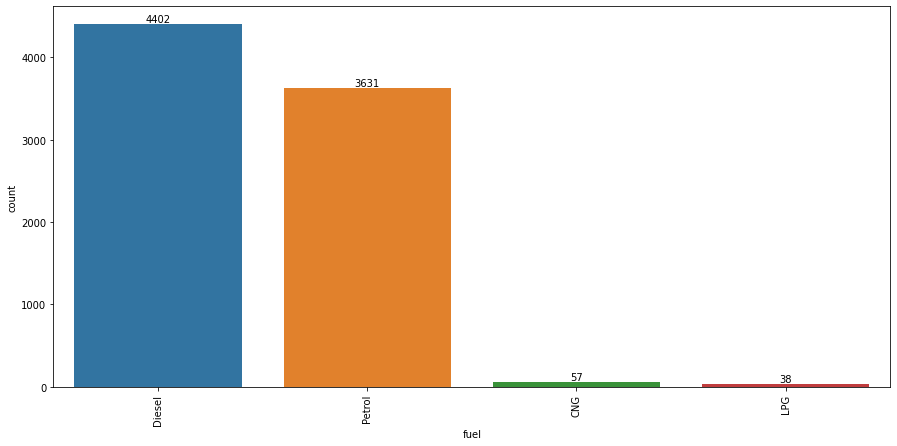

In [ ]:
def bar_plot(data,col):
  plt.figure(figsize = (15, 7))
  plot = sns.countplot(x = col, data = data,
                       order = data[col].value_counts().index)
  plt.xticks(rotation = 90)
  for p in plot.patches:
      plot.annotate(p.get_height(), 
                          (p.get_x() + p.get_width() / 2.0, 
                          p.get_height()), 
                          ha = 'center', 
                          va = 'center', 
                          xytext = (0, 5),
                          textcoords = 'offset points')
bar_plot(data,'fuel')      

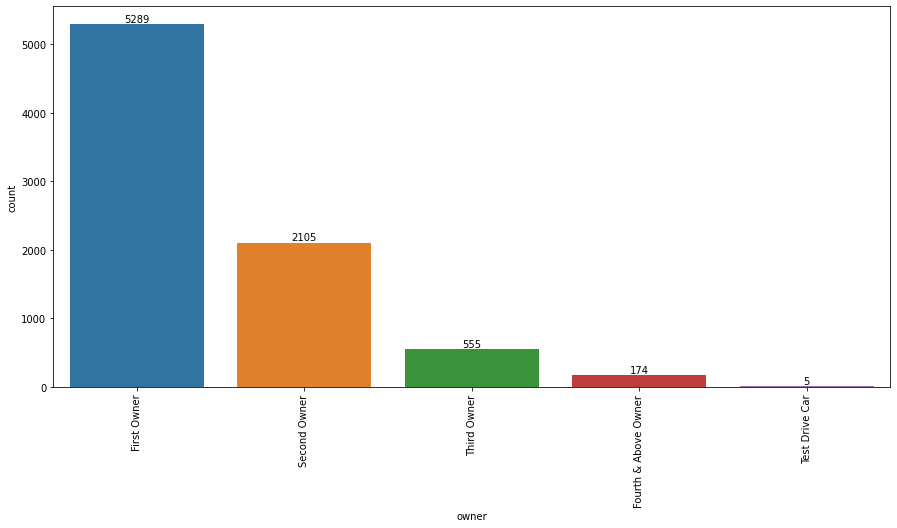

In [ ]:
bar_plot(data,'owner')

# ***Data preprocessing/Data Cleaning***

In [ ]:
data.drop(['torque','seller_type'],axis=1,inplace=True)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
def extraction(data,col):
  data[col] = data[col].str.split(" ", expand = True)[0]
def convert_tofloat(data,col)  :
  data[col]=pd.to_numeric(data[col])
def fillNAN(data,col):
  data[col].fillna(data[col].astype("float64").mean(), inplace = True)



In [ ]:
extraction(data,'name')
extraction(data,'mileage')
extraction(data,'engine')
extraction(data,'max_power')

In [ ]:
convert_tofloat(data,'mileage')
convert_tofloat(data,'engine')
convert_tofloat(data,'max_power')

In [ ]:
fillNAN(data,'mileage')
fillNAN(data,'engine')
fillNAN(data,'seats')
fillNAN(data,'max_power')

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


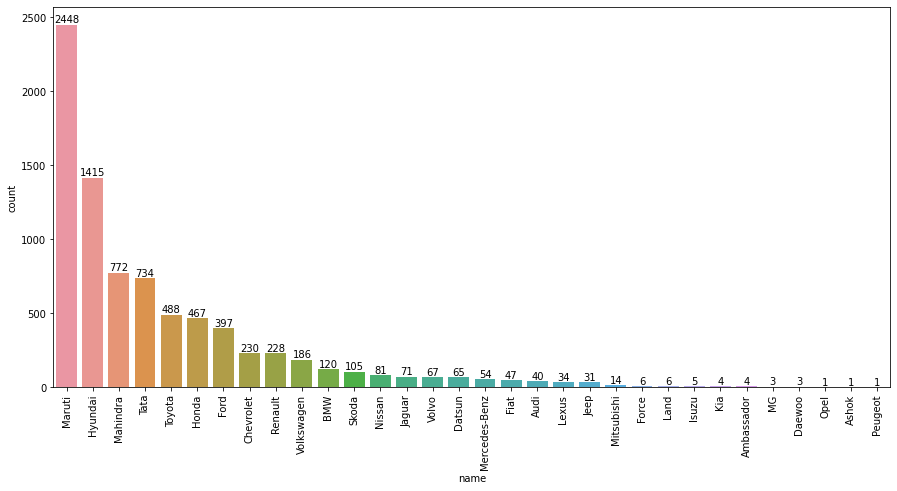

In [ ]:
bar_plot(data,'name')
#name ayant un count <15 va etre considerer comme other

In [ ]:
car_count=data['name'].value_counts(ascending=False)
car_count_less15=car_count[car_count<15]
print(car_count_less15)

Mitsubishi    14
Force          6
Land           6
Isuzu          5
Kia            4
Ambassador     4
MG             3
Daewoo         3
Opel           1
Ashok          1
Peugeot        1
Name: name, dtype: int64


In [ ]:
data['name'] = data['name'].apply(lambda x: 'other' if x in car_count_less15 else x)

In [ ]:
data.sample(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
3472,Volkswagen,2012,280000,80000,Diesel,Manual,Third Owner,20.54,1598.0,103.60,5.0
6500,Honda,2018,700000,43000,Diesel,Manual,First Owner,27.40,1498.0,98.63,5.0
2707,Toyota,2007,465000,210000,Diesel,Manual,Second Owner,12.80,2494.0,102.00,8.0
2248,Maruti,2018,550000,24400,Petrol,Manual,First Owner,22.00,1197.0,81.80,5.0
1059,Honda,2016,625000,54000,Petrol,Manual,First Owner,18.70,1199.0,88.70,5.0
5202,Maruti,2012,300000,110000,Diesel,Manual,Third Owner,22.90,1248.0,74.00,5.0
3781,Maruti,2016,330000,30000,Petrol,Manual,First Owner,23.95,998.0,67.05,5.0
59,Audi,2013,1689999,50000,Diesel,Automatic,First Owner,18.53,1968.0,187.74,5.0
2305,Mahindra,2013,350000,110000,Diesel,Manual,Second Owner,17.21,1493.0,100.00,7.0
72,Maruti,2019,1025000,9850,Diesel,Automatic,First Owner,24.30,1248.0,88.50,5.0


***les voitures manuels et automatiques***

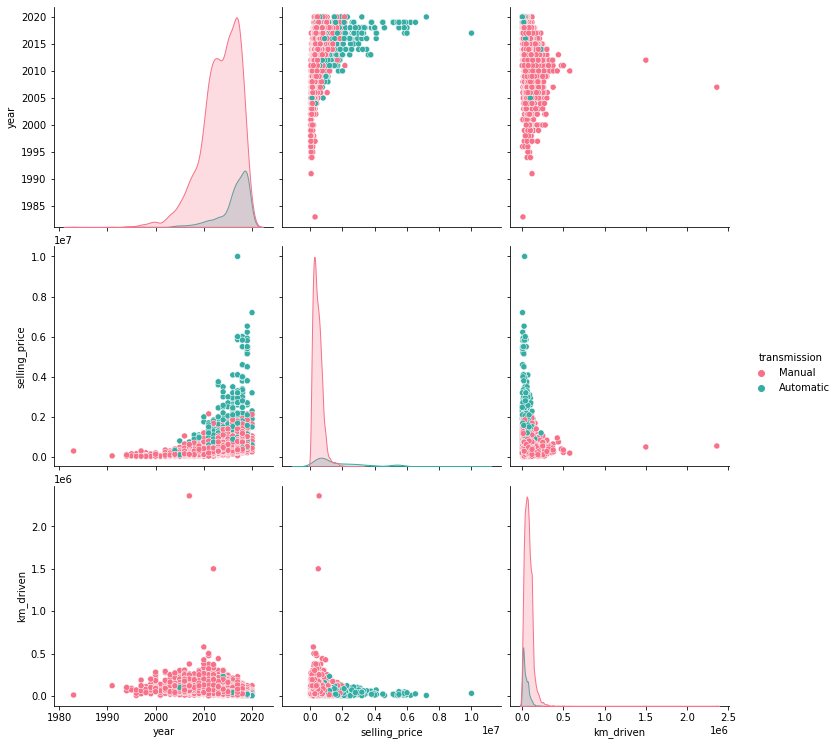

In [ ]:
sns.pairplot(data[['year','selling_price','km_driven','transmission']],hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

#le prix du voitures automatique est plus elevé que de celle du voitures manuelles
# le nombre des voitures automatiques augmente les derniers années (entre 2015 et 2020)

***le type du carburant***

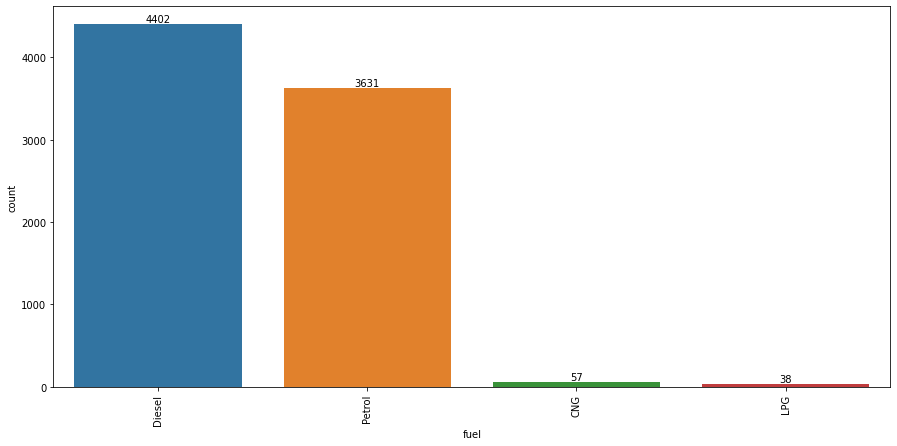

In [ ]:
bar_plot(data,'fuel')
#on constate que les 2 types(diesel et pertrol) sont les plus trouvés dans les données
#donc l'idée de renommer les autres type par 'other'

In [ ]:
data['fuel']=data['fuel'].apply(lambda x : x if x in ['Diesel','Petrol'] else 'other' )

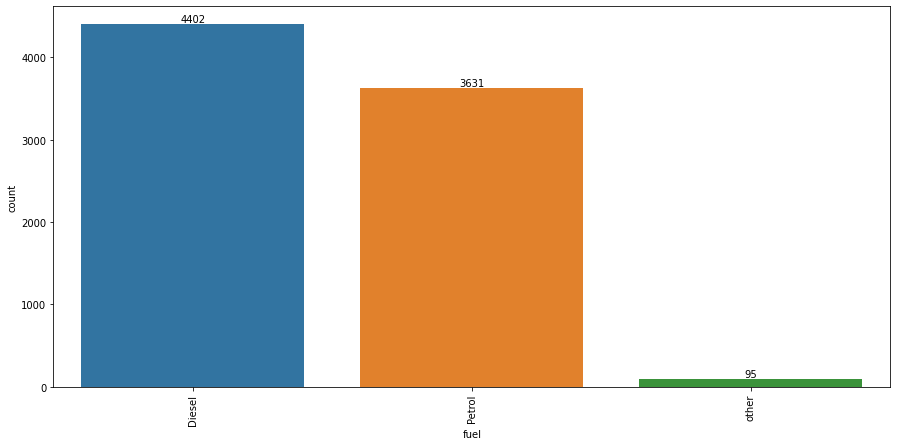

In [ ]:
bar_plot(data,'fuel')

In [ ]:
manuel = data[data['transmission']=='Manual']
automatique = data[data['transmission']=='Automatic']

les voitures automatique


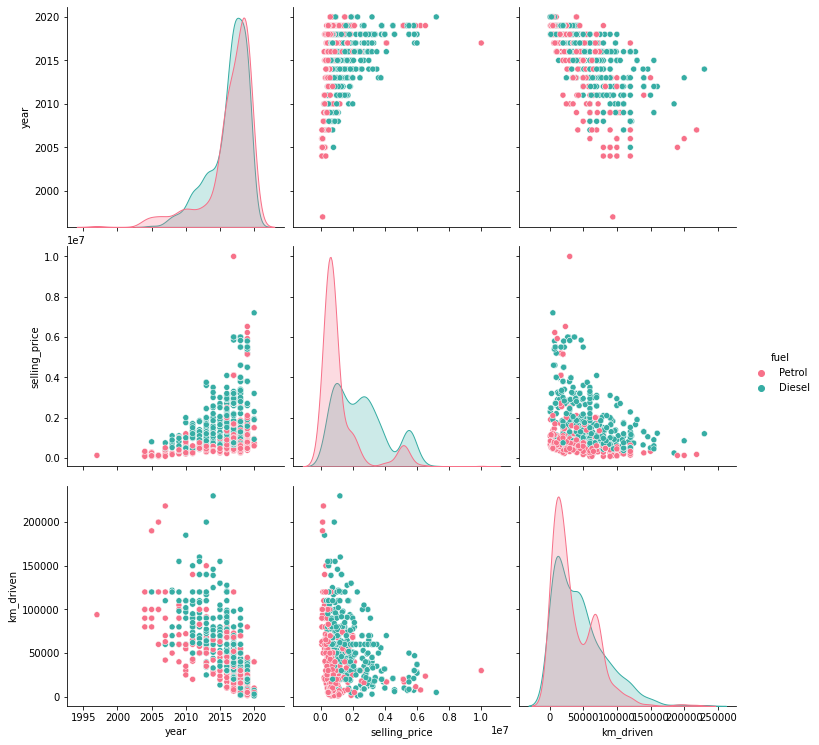

In [ ]:
print('les voitures automatique')
sns.pairplot(automatique[['year','selling_price','km_driven','fuel']],hue = 'fuel',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

les voitures manuel


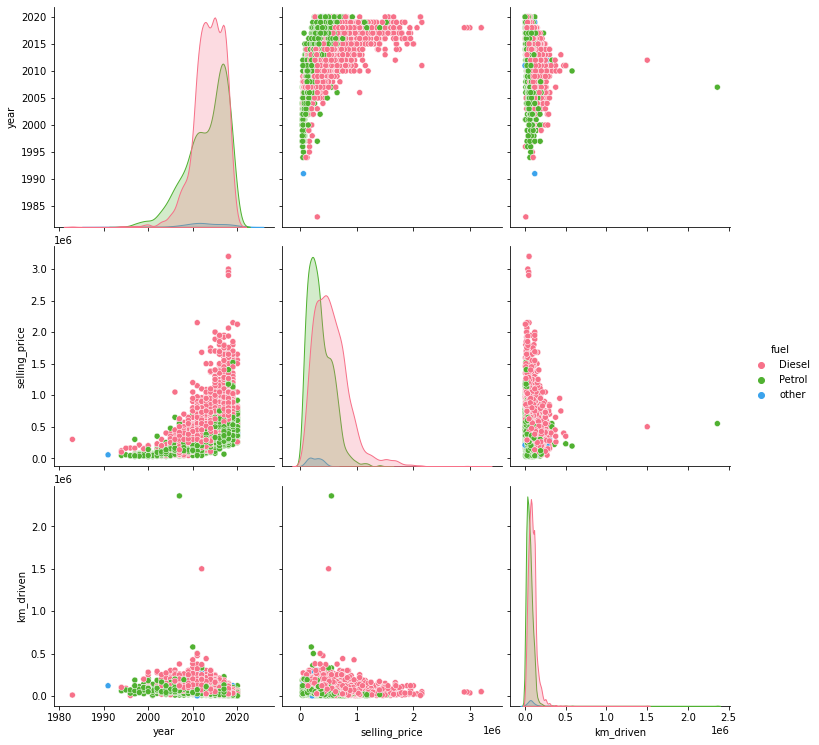

In [ ]:
print('les voitures manuel')
sns.pairplot(manuel[['year','selling_price','km_driven','fuel']],hue = 'fuel',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

**propriétaire**

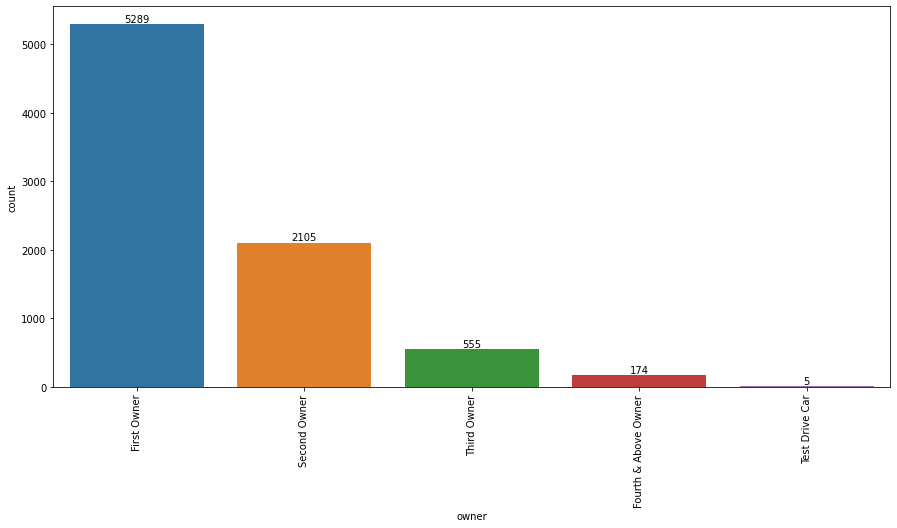

In [ ]:
bar_plot(data,'owner')
#on a  5 voitures classés comme voitures d'essai(test Driver Car), donc l'idée c'est de les suprimer de notre dataset
# Aussi (fisrt owner et second owner ) presente la plus part de notre data , donc tous les autres type consederé comme (Third Owner & Above)

In [ ]:
data = data[~(data['owner']=='Test Drive Car')]
data['owner'] = data['owner'].apply(lambda x: x if x in ['First Owner','Second Owner'] else 'Third Owner & Above')

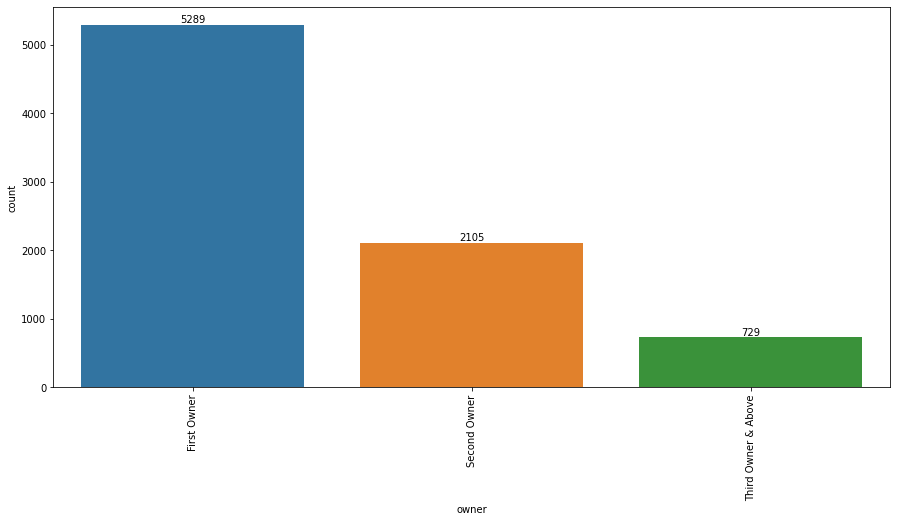

In [ ]:
bar_plot(data,'owner')

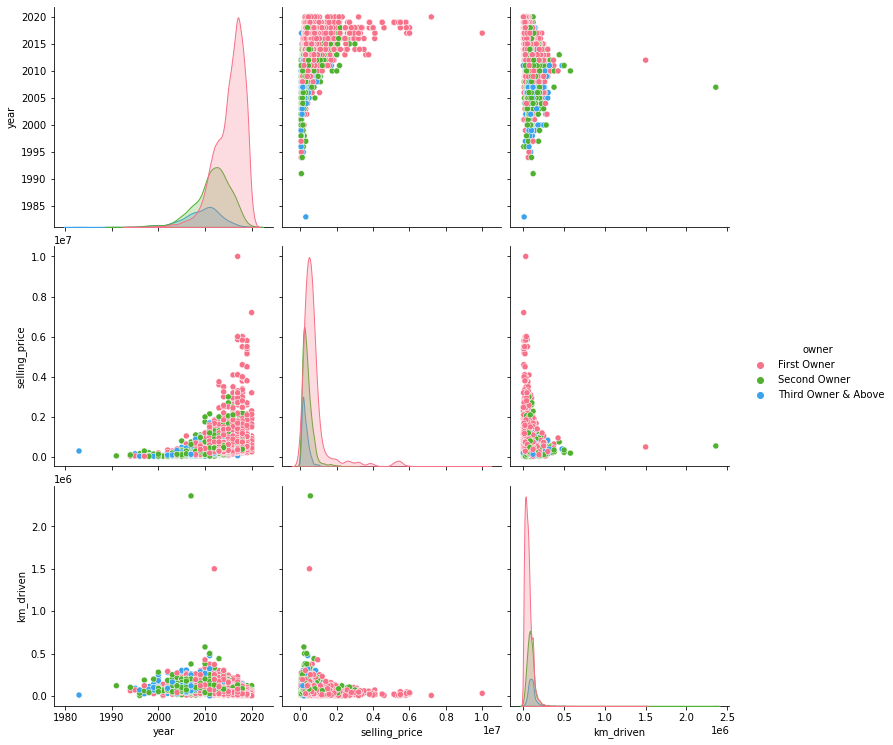

In [ ]:
sns.pairplot(data[['year','selling_price','km_driven','owner']],hue = 'owner',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

***year and km_driven***

In [ ]:
km_mean = data.groupby('year')['km_driven'].mean()
manual=data[data['transmission']=='Manual']
automatique=data[data['transmission']=='Automatic']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


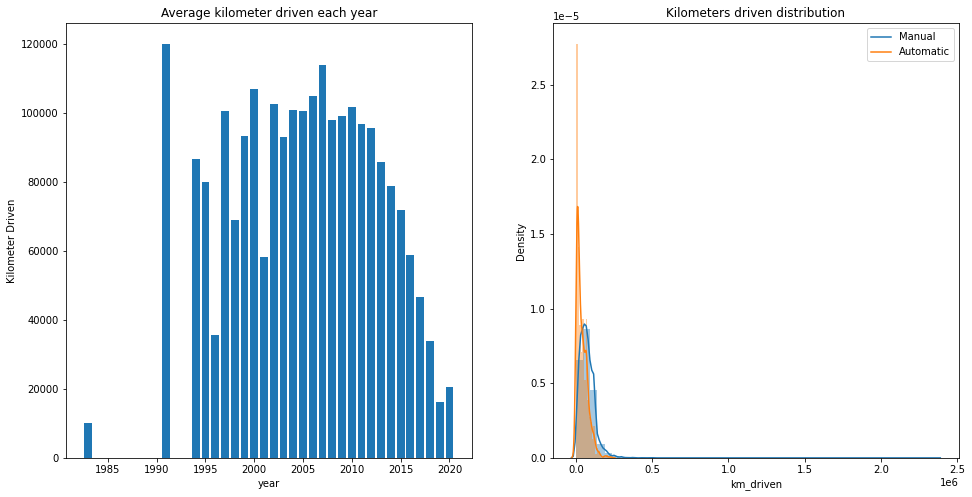

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['km_driven'],ax=ax[1])
sns.distplot(automatique['km_driven'],ax=ax[1])

ax[0].set_title('Average kilometer driven each year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Kilometer Driven')

ax[1].set_title('Kilometers driven distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

#Nous pouvons voir que les kilomètres parcourus en moyenne augmentent de 1995 à 2005
# et diminuent linéairement jusqu'en 2020. Nous pouvons également voir des outliers présentes dans le graphique de distribution.
#==>(outliers à supp)

***Year and Selling Price***

In [ ]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

In [ ]:
year_mean_automatic

year
1997    1.250000e+05
2004    1.780000e+05
2005    2.741667e+05
2006    1.070000e+05
2007    3.825000e+05
2008    5.870000e+05
2009    5.810000e+05
2010    7.408332e+05
2011    8.864483e+05
2012    8.677391e+05
2013    1.224256e+06
2014    1.321971e+06
2015    1.023362e+06
2016    1.424486e+06
2017    2.110395e+06
2018    1.708313e+06
2019    2.891692e+06
2020    1.780688e+06
Name: selling_price, dtype: float64

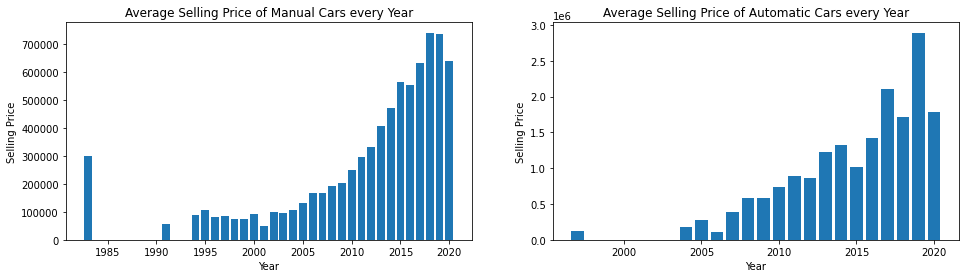

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

#Nous pouvons voir que le prix de vente des voitures manuelles augmente de manière linéaire 
#chaque année alors que les voitures automatiques ont des moyennes ondulées chaque année,
 #mais nous pouvons clairement voir que le prix de vente augmente également de manière linéaire.

# **Effacer les outliers**

**KM_driven**

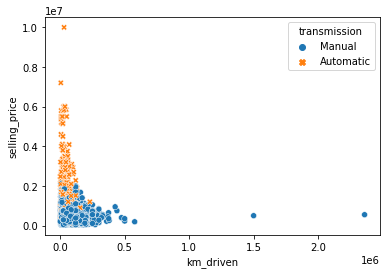

In [ ]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

In [ ]:
def remove_outlier_km_driven(data):
    temp = pd.DataFrame()
    
    data_km_driven = data['km_driven']
    Q1 = data_km_driven.quantile(0.25)
    Q3 = data_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    data_outlier = data_km_driven[(data_km_driven < (Q1 - 1.5 * IQR)) | (data_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,data_outlier])
        
    return data.drop(temp.index)

data = remove_outlier_km_driven(data)

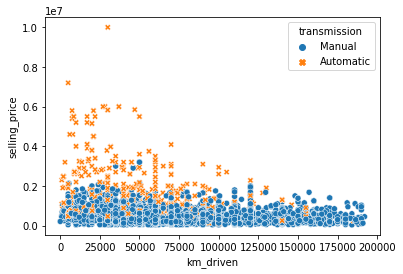

In [ ]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

**Selling Price**

In [ ]:
def remove_outlier_selling_price(data):
    temp = pd.DataFrame()
    for year in sorted(data.year.unique()):
        year_price_manual = data[(data['year']==year) & (data['transmission']=='Manual')]['selling_price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = data[(data['year']==year) & (data['transmission']=='Automatic')]['selling_price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return data.drop(temp.index)

data = remove_outlier_selling_price(data)

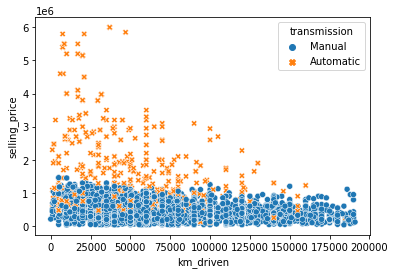

In [ ]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

**Year**

In [ ]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

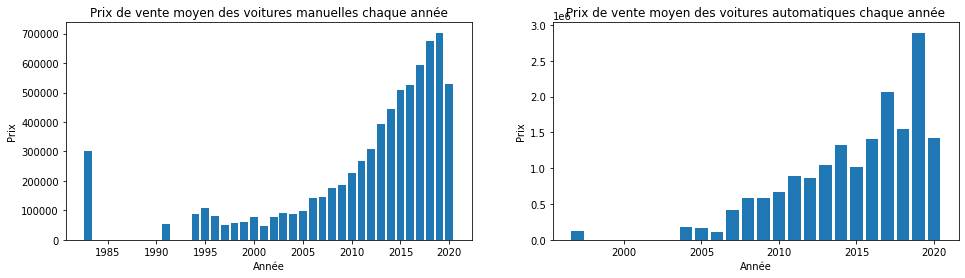

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix')
plt.show()

In [ ]:
data=data[data['year']>2005]

In [ ]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

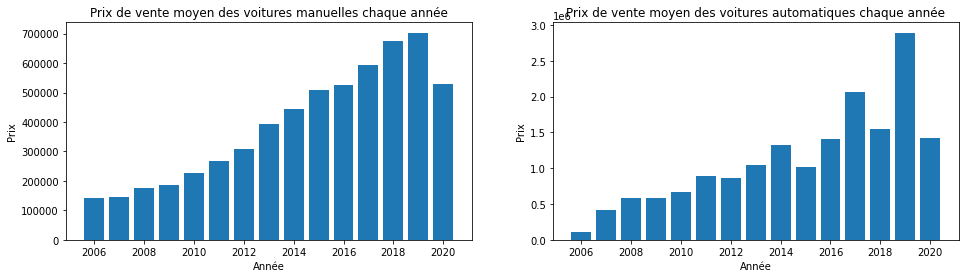

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix')
plt.show()

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Manual,Third Owner & Above,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


Text(0.5, 1.0, 'Matrice de correclation')

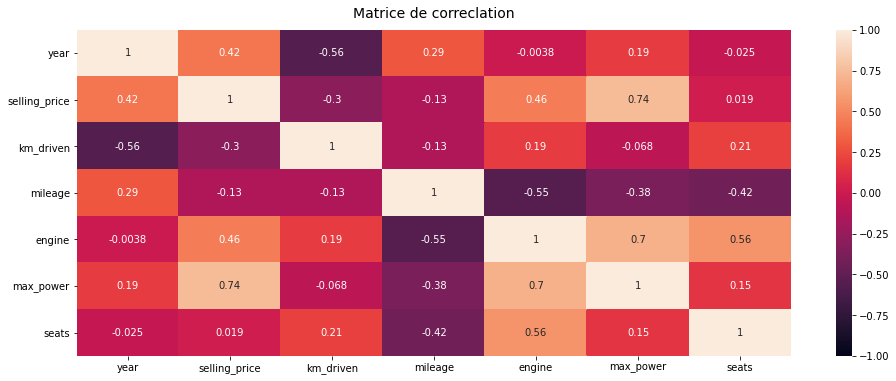

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, 
#and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Matrice de correclation', fontdict={'fontsize':14}, pad=12)

In [ ]:
data.drop(['mileage','seats'],axis=1,inplace=True)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,engine,max_power
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Manual,Second Owner,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Manual,Third Owner & Above,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Manual,First Owner,1298.0,88.20


#**Data Preparation**

In [ ]:
name=pd.get_dummies(data['name'])
fuel = pd.get_dummies(data['fuel'])
transmission = pd.get_dummies(data['transmission'])
owner = data['owner'].map(lambda x: 1 if x=='First Owner' else 2 if x=='Second Owner' else 3)

In [ ]:
features = pd.concat([name,fuel,transmission,owner,data.drop(['name','transmission','fuel','owner','selling_price'],axis=1)],axis=1)
target = data['selling_price']

In [ ]:
features

,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,Lexus,Mahindra,Maruti,Mercedes-Benz,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,other,Diesel,Petrol,other,Automatic,Manual,owner,year,km_driven,engine,max_power
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2014,145500,1248.0,74.00
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,2014,120000,1498.0,103.52
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,2006,140000,1497.0,78.00
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2010,127000,1396.0,90.00
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2007,120000,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2013,110000,1197.0,82.85
8124,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2007,119000,1493.0,110.00
8125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2009,120000,1248.0,73.90
8126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,2013,25000,1396.0,70.00


In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'n_estimators': range(1,50,5)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(features,target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264033709972536.16, tolerance: 369985910129.43884
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254241499993867.4, tolerance: 358431194063.8271
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239847732767391.56, tolerance: 356262642661.4036
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237362526

,model,best_score,best_params
0,linear_regression,0.852204,{'normalize': False}
1,lasso,0.852209,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.963934,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,0.975623,"{'criterion': 'mse', 'n_estimators': 46}"


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestRegressor(criterion='mse',n_estimators=46)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=46, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
round(model.score(X_test,y_test),2) #Afficher la performance du modéle

0.98

In [ ]:
#tester si on a : underfitting / overfitting/ best fit
print( 'le score du train est :', round(model.score(X_train, y_train),2) )
print( 'le score du test est :', round(model.score(X_test, y_test)  ,2) )
#le score de train et de test sont presque egaux ==> best fit 

le score du train est : 1.0
le score du test est : 0.98


In [ ]:
def predict_price(name,transmission,fuel,owner,year,km_driven,engine,max_power):
    x = []
    x[:26] = np.zeros(32,dtype='int32')
    x[27] = owner
    x[28] = year
    x[29] = km_driven
    x[30] = engine
    x[31] = max_power
    
    name_index = np.where(features.columns==name)[0][0]
    transmission_index = np.where(features.columns==transmission)[0][0]
    fuel_index = np.where(features.columns==fuel)[0][0]
    
    if name_index>=0:
        x[name_index] = 1
    if transmission_index>=0:
        x[transmission_index] = 1
    if fuel_index>=2:
        x[fuel_index] = 1
        
    return float(format(model.predict([x])[0],'.2f'))

In [ ]:
predict_price('Audi','Manual','Petrol',1,2013,10000,2050,150)

1987849.72

In [ ]:
predict_price('Audi','Automatic','Diesel',1,2015,100000,2050,150)

1480130.43

In [ ]:
predict_price('Audi','Automatic','Petrol',1,2013,100000,2050,150)

947282.61

In [ ]:
predict_price('Audi','Automatic','Petrol',1,2013,100000,2050,80)

511608.61

# **Extraction de modele**

In [ ]:
import pickle
with open('car price prediction.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
import json
columns = {
#contient toutes les colonnes de dataframe (les noms des locations)  
    'data_columns' : [col.lower() for col in features.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
data.describe()

,year,selling_price,km_driven,engine,max_power
count,7375.000000,7.375000e+03,7375.000000,7375.000000,7375.000000
mean,2014.312000,6.318343e+05,64501.172881,1422.403831,90.281680
std,3.353164,7.865518e+05,39630.741454,462.694317,33.845313
min,2006.000000,3.500000e+04,1.000000,624.000000,0.000000
25%,2012.000000,2.700000e+05,32000.000000,1197.000000,69.000000
50%,2015.000000,4.500000e+05,60000.000000,1248.000000,82.000000
75%,2017.000000,6.500000e+05,90000.000000,1498.000000,99.415000
max,2020.000000,6.000000e+06,191000.000000,3604.000000,282.000000
